 # Analysis of *Supernatural* TV Show Viewership

## About the Show

***Supernatural*** is an American dark fantasy television series created by *Eric Kripke*. It follows the story of two brothers, **Sam Winchester** and **Dean Winchester**, as they hunt *demons*, *ghosts*, *monsters*, and other *supernatural beings*. The series premiered on September 13, 2005, on The WB, and subsequently became part of successor The CW's lineup. The series ran for fifteen seasons, concluding on November 19, 2020.

## Show Images

<table style="border: none; border-collapse: collapse; margin-left: 0; text-align: left;">
  <tr style="border: none;">
    <td style="border: none; padding-right: 10px; vertical-align: top; text-align: left;">
      <img src="pictures/picture_poster.jpg" alt="Supernatural Poster 1" style="width:300px; height:auto; display: block;">
    </td>
    <td style="border: none; padding: 10px; vertical-align: top; text-align: left;"> <img src="pictures/picture_poster_2.jpg" alt="Supernatural Poster 2" style="width:530px; height:auto; display: block;"> </td>
  </tr>
</table>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Data for Supernatural
data_supernatural = {
    'Season': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Episodes': [22, 22, 16, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 20, 20],
    'Rank': [165, 216, 187, 161, 125, 209, 176, 152, 141, 156, 131, 132, 166, 159, 131],
    'Avg_Viewers_Millions': [3.81, 3.14, 2.74, 3.14, 2.64, 2.42, 2.03, 2.52, 2.81, 2.02, 2.81, 2.62, 2.32, 2.07, 1.63]
}
df_supernatural = pd.DataFrame(data_supernatural)

In [9]:
styled_df = df_supernatural.style.set_caption("Supernatural Viewership Data by Season") \
                               .hide(axis="index") \
                               .format({"Avg_Viewers_Millions": "{:.2f}M", "Rank": "{}"}) 

styled_df

Season,Episodes,Rank,Avg_Viewers_Millions
1,22,165,3.81M
2,22,216,3.14M
3,16,187,2.74M
4,22,161,3.14M
5,22,125,2.64M
6,22,209,2.42M
7,23,176,2.03M
8,23,152,2.52M
9,23,141,2.81M
10,23,156,2.02M


In [ ]:
# Code cell
# print("## Supernatural Viewership Statistics Summary") 
print(f"Total Seasons: {df_supernatural['Season'].max()}")
print(f"Total Episodes (from table sum): {df_supernatural['Episodes'].sum()}")

overall_avg_viewers = df_supernatural['Avg_Viewers_Millions'].mean()
print(f"Overall Average Viewers (across seasons): {overall_avg_viewers:.2f} million")

peak_season_data = df_supernatural.loc[df_supernatural['Avg_Viewers_Millions'].idxmax()]
print(f"Highest Average Season Viewership: {peak_season_data['Avg_Viewers_Millions']:.2f} million (Season {int(peak_season_data['Season'])})")

lowest_season_data = df_supernatural.loc[df_supernatural['Avg_Viewers_Millions'].idxmin()]
print(f"Lowest Average Season Viewership: {lowest_season_data['Avg_Viewers_Millions']:.2f} million (Season {int(lowest_season_data['Season'])})")

## Supernatural Viewership Statistics Summary
Total Seasons: 15
Total Episodes (from table sum): 327
Overall Average Viewers (across seasons): 2.58 million
Highest Average Season Viewership: 3.81 million (Season 1)
Lowest Average Season Viewership: 1.63 million (Season 15)


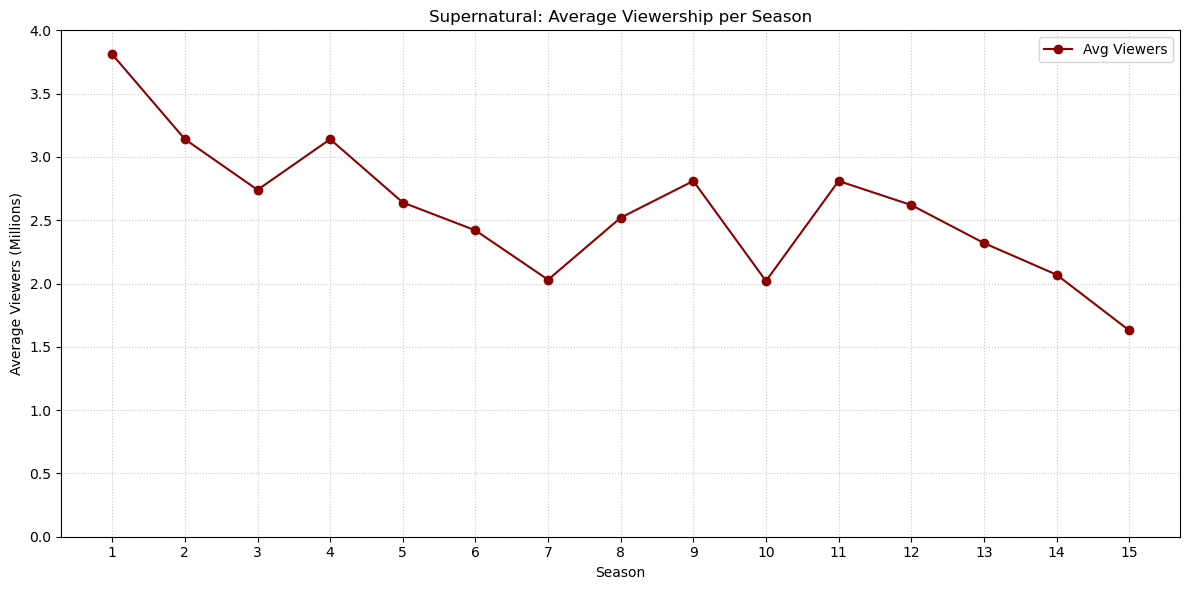

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df_supernatural['Season'], df_supernatural['Avg_Viewers_Millions'], marker='o', linestyle='-', color='darkred', label='Avg Viewers')
plt.title('Supernatural: Average Viewership per Season')
plt.xlabel('Season')
plt.ylabel('Average Viewers (Millions)')
plt.xticks(df_supernatural['Season'])

plt.yticks(ticks=[i/2 for i in range(0, int(max(df_supernatural['Avg_Viewers_Millions'])*2)+2)])
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

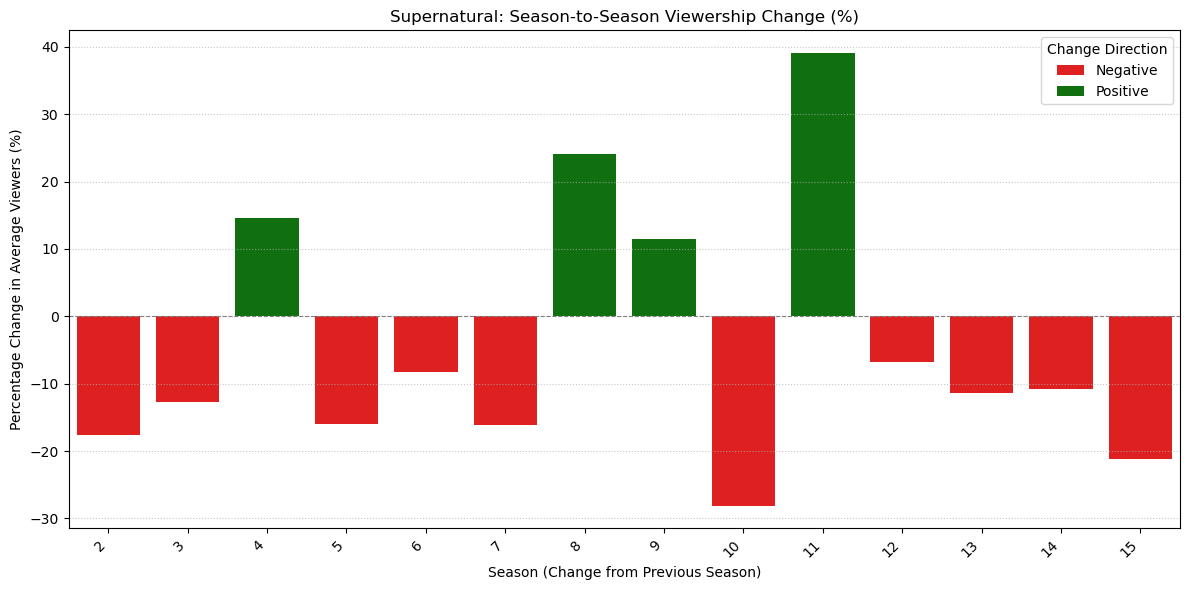

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

df_supernatural['Viewership_Pct_Change'] = df_supernatural['Avg_Viewers_Millions'].pct_change() * 100

df_plot_data = df_supernatural.dropna(subset=['Viewership_Pct_Change']).copy()
df_plot_data['Change_Direction'] = np.where(df_plot_data['Viewership_Pct_Change'] >= 0, 'Positive', 'Negative')

color_palette = {'Positive': 'green', 'Negative': 'red'}

plt.figure(figsize=(12, 6))

sns.barplot(
    x=df_plot_data['Season'].astype(str),
    y='Viewership_Pct_Change',
    hue='Change_Direction', 
    data=df_plot_data,
    palette=color_palette, 
    dodge=False 
)

plt.title('Supernatural: Season-to-Season Viewership Change (%)')
plt.xlabel('Season (Change from Previous Season)')
plt.ylabel('Percentage Change in Average Viewers (%)')
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')

plt.xticks(ticks=np.arange(len(df_plot_data['Season'])), labels=df_plot_data['Season'].astype(str), rotation=45, ha="right")

plt.legend(title='Change Direction')

plt.grid(True, axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
s1_viewers = df_supernatural.loc[df_supernatural['Season'] == 1, 'Avg_Viewers_Millions'].iloc[0]
s2_viewers = df_supernatural.loc[df_supernatural['Season'] == 2, 'Avg_Viewers_Millions'].iloc[0]
s1_to_s2_pct_change = df_supernatural.loc[df_supernatural['Season'] == 2, 'Viewership_Pct_Change'].iloc[0] # Change from S1 to S2

peak_season_data = df_supernatural.loc[df_supernatural['Avg_Viewers_Millions'].idxmax()]
peak_viewers = peak_season_data['Avg_Viewers_Millions']
peak_season_num = int(peak_season_data['Season'])

lowest_season_data = df_supernatural.loc[df_supernatural['Avg_Viewers_Millions'].idxmin()]
lowest_viewers = lowest_season_data['Avg_Viewers_Millions']
lowest_season_num = int(lowest_season_data['Season'])

# For the S3 to S4 
s3_to_s4_pct_change = df_supernatural.loc[df_supernatural['Season'] == 4, 'Viewership_Pct_Change'].iloc[0] # Change from S3 to S4

# For the S9 to S10
s9_to_s10_pct_change = df_supernatural.loc[df_supernatural['Season'] == 10, 'Viewership_Pct_Change'].iloc[0] # Change from S9 to S10

# For the S10 to S11 
s10_to_s11_pct_change = df_supernatural.loc[df_supernatural['Season'] == 11, 'Viewership_Pct_Change'].iloc[0] # Change from S10 to S11

s15_viewers = df_supernatural.loc[df_supernatural['Season'] == 15, 'Avg_Viewers_Millions'].iloc[0]

# print(f"S1 Viewers: {s1_viewers:.2f}")
# print(f"S2 Viewers: {s2_viewers:.2f}")
# print(f"S1 to S2 Pct Change: {s1_to_s2_pct_change:.2f}%")
# print(f"Peak Season: {peak_season_num}, Peak Viewers: {peak_viewers:.2f}")
# print(f"Lowest Season: {lowest_season_num}, Lowest Viewers: {lowest_viewers:.2f}")
# print(f"S3 to S4 Pct Change: {s3_to_s4_pct_change:.2f}%")
# print(f"S9 to S10 Pct Change: {s9_to_s10_pct_change:.2f}%")
# print(f"S10 to S11 Pct Change: {s10_to_s11_pct_change:.2f}%")
# print(f"S15 Viewers: {s15_viewers:.2f}")

## Analysis of Viewership Trends

*Supernatural* started its long journey with an average viewership of **`[S1 viewers: e.g., 3.81]` million** viewers in its inaugural season. The following season saw a notable shift, with viewership falling to **`[S2 viewers: e.g., 3.14]` million**, a decrease of aprox. **`[S1 to S2 % change: e.g., -17.59]%`**.

The series achieved its peak average viewership during its **`[Peak Season Number: e.g., Season 1]`** with **`[Peak Viewers: e.g., 3.81]` million** average viewers. On the other hand, the show experienced its lowest average viewership in **`[Lowest Season Number: e.g., Season 15]`**, drawing **`[Lowest Viewers: e.g., 1.63]` million** viewers on average.

Examining the season-to-season changes reveals a dynamic viewership pattern. For instance, after a period of decline or smaller fluctuations, Season 4 marked a positive resurgence with a **`[S3 to S4 % change: e.g., +14.6]%`** increase in viewership. However, this was often followed by subsequent dips, such as the significant drop of nearly **`[S9 to S10 % change: e.g., -28.11]%`** between Season 9 and Season 10. One of the most influential positive turnarounds occurred leading into Season 11, which saw viewership jump by approx. **`[S10 to S11 % change: e.g., +39.11]%`**. The later seasons, from Season 12 onwards, generally showed a consistent downward trend in percentage change, with most seasons experiencing a decline in viewership compared to the previous one.

The final season (Season 15) concluded with an average viewership of **`[S15 viewers: e.g., 1.63]` million**, marking the end of an era for the show.

In [ ]:
# To run report through command line
!jupyter nbconvert --to html --TagRemovePreprocessor.remove_input_tags="['hide_input']" --output-dir=report supernatural_report.ipynb

[NbConvertApp] Converting notebook supernatural_report.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 435664 bytes to raport\supernatural_report.html
